# Problem Statement: To build a predictive model to predict whether
a loan would be approved or declined


In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [6]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [7]:
# df['Dependents'].apply({'3+':3})

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df['Married']=df['Married'].replace({'No':0,'Yes':1})
df['Education']=df['Education'].replace({'Not Graduate':0,'Graduate':1})
df['Self_Employed']=df['Self_Employed'].replace({'No':0,'Yes':1})
df['Loan_Status']=df['Loan_Status'].replace({'N':0,'Y':1})


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [16]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [17]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [18]:
proper_area =pd.get_dummies(df['Property_Area'],drop_first=True)


In [19]:
proper_area

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [20]:
# df1= pd.get_dummies(df,columns = ['Property_Area'])
# df1

In [21]:
df = pd.concat([df,proper_area],axis=1)

In [22]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [23]:
df.drop(['Property_Area'],axis=1,inplace=True)

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int64  
 11  Semiurban          614 non-null    uint8  
 12  Urban              614 non-null    uint8  
dtypes: float64(4), int64(6), object(1), uint8(2)
memory usage: 54.1+ KB


In [26]:
df['Dependents']=df['Dependents'].astype(int)

In [27]:
df['Dependents'].unique()

array([0, 1, 2, 3])

In [28]:
# df['Property_Area'].unique()

In [29]:
# df['Property_Area']=df['Property_Area'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int64  
 11  Semiurban          614 non-null    uint8  
 12  Urban              614 non-null    uint8  
dtypes: float64(4), int32(1), int64(6), uint8(2)
memory usage: 51.7 KB


In [31]:
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,1


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# sns.distplot(df['ApplicantIncome'])

In [35]:
# sns.kdeplot(df['ApplicantIncome'],fill=True)

In [36]:
# sns.kdeplot(df['CoapplicantIncome'],fill=True)

In [37]:
# for j,i in np.ndenumerate(df['ApplicantIncome']):
#     sns.scatterplot(x = j,y = i)

In [38]:
# sns.pairplot(df)

In [39]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [40]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler 

In [41]:
min_max = MinMaxScaler()
x_scaled = min_max.fit_transform(x)

In [42]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,1.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,0.0,1.0
1,1.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,0.0,1.0
3,1.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,0.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,1.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,0.0
610,1.0,1.0,1.000000,1.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,0.0
611,1.0,1.0,0.333333,1.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,0.0,1.0
612,1.0,1.0,0.666667,1.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,0.0,1.0


In [43]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Semiurban', 'Urban'],
      dtype='object')

In [44]:
# for j,i in np.ndenumerate(x_scaled['ApplicantIncome']):
#     sns.scatterplot(x = j,y = i)

<AxesSubplot:ylabel='ApplicantIncome'>

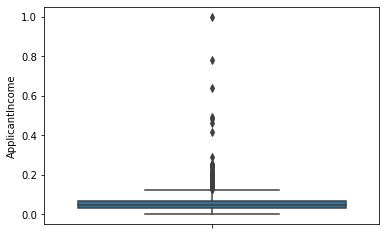

In [45]:
sns.boxplot(y=x_scaled['ApplicantIncome'])

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [48]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [50]:
y_pred_test = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)
print("TRAINING Acuuracy is \n:",accuracy_score(y_train,y_pred_train))
print("TESTING Acuuracy is\n:",accuracy_score(y_test,y_pred_test))
print("TRAINING MConfusion metrics is \n:",confusion_matrix(y_train,y_pred_train))
print("TESTING MConfusion metrics is \n:",confusion_matrix(y_test,y_pred_test))
print("TRAINING Classification report is \n:",classification_report(y_train,y_pred_train))
print("TESTING Classification report is \n:",classification_report(y_test,y_pred_test))

TRAINING Acuuracy is 
: 1.0
TESTING Acuuracy is
: 0.8211382113821138
TRAINING MConfusion metrics is 
: [[154   0]
 [  0 337]]
TESTING MConfusion metrics is 
: [[23 15]
 [ 7 78]]
TRAINING Classification report is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

TESTING Classification report is 
:               precision    recall  f1-score   support

           0       0.77      0.61      0.68        38
           1       0.84      0.92      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.76      0.78       123
weighted avg       0.82      0.82      0.81       123



In [51]:
# from sklearn.model_selection import GridSearchCV

In [52]:
# d={'n_estimators':list(range(97,105)),'criterion':['gini','entropy'],
#    'max_depth':list(range(2,7)),'min_samples_split':np.arange(2,7),'min_samples_leaf':list(range(2,7))}
# gscv=GridSearchCV(rfc,param_grid=d,cv=10)
# gscv.fit(x_train,y_train)
# gscv.best_params_

In [53]:
# gscv_rf_Reg.best_params_

In [54]:
gscv_best_model = RandomForestClassifier(n_estimators =97 ,criterion = 'gini',max_depth =2 ,min_samples_leaf = 2,min_samples_split =2 )

gscv_best_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=97)

In [55]:
y_pred_test = gscv_best_model.predict(x_test)
y_pred_train = gscv_best_model.predict(x_train)
print("TRAINING Acuuracy is \n:",accuracy_score(y_train,y_pred_train))
print("TESTING Acuuracy is\n:",accuracy_score(y_test,y_pred_test))
print("TRAINING MConfusion metrics is \n:",confusion_matrix(y_train,y_pred_train))
print("TESTING MConfusion metrics is \n:",confusion_matrix(y_test,y_pred_test))
print("TRAINING Classification report is \n:",classification_report(y_train,y_pred_train))
print("TESTING Classification report is \n:",classification_report(y_test,y_pred_test))

TRAINING Acuuracy is 
: 0.7942973523421588
TESTING Acuuracy is
: 0.8211382113821138
TRAINING MConfusion metrics is 
: [[ 58  96]
 [  5 332]]
TESTING MConfusion metrics is 
: [[17 21]
 [ 1 84]]
TRAINING Classification report is 
:               precision    recall  f1-score   support

           0       0.92      0.38      0.53       154
           1       0.78      0.99      0.87       337

    accuracy                           0.79       491
   macro avg       0.85      0.68      0.70       491
weighted avg       0.82      0.79      0.76       491

TESTING Classification report is 
:               precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        85

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.84      0.82      0.80       123



In [56]:
import pickle

In [57]:
pickle.dump(rfc,open('new_model.pkl',"wb"))